# WeatherPy
----

#### Observations
 
1) Temperature has a strong correlation with distance from the equator. It appears that as one moves south from the equator the change in temperature appears to change more quickly. This may only appear to be the case since there is a large amount of ocean below -50 degrees latitude and so there is a lack data in that area.

2) There is no correlation between latitude and cloudiness but there appears to be bands at 100, 75, 20, and 0%. This may have to do with how the percentage is determined and recorded.

3) There is no correlation between latitude and humidity or wind speed.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [6]:
#create lists for weather info
city_name=[]
cloudiness=[]
humidity=[]
lat=[]
lng=[]
temp=[]
wind=[]
index_count=0
set_count=1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
    
        else:
            index_count = index_count + 1
            
        print(f"Processing Record {index_count} of Set {set_count} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : vaini
City not found. Skipping...
Processing Record 2 of Set 1 : rikitea
Processing Record 3 of Set 1 : hermanus
Processing Record 4 of Set 1 : shakhtinsk
Processing Record 5 of Set 1 : cape town
Processing Record 6 of Set 1 : albany
Processing Record 7 of Set 1 : jamestown
Processing Record 8 of Set 1 : dvinskoy
Processing Record 9 of Set 1 : yashkul
Processing Record 10 of Set 1 : geraldton
Processing Record 11 of Set 1 : opuwo
Processing Record 12 of Set 1 : temiscaming
Processing Record 13 of Set 1 : ushuaia
Processing Record 14 of Set 1 : mahebourg
Processing Record 15 of Set 1 : faya
City not found. Skipping...
Processing Record 16 of Set 1 : shimoda
Processing Record 17 of Set 1 : punta arenas
Processing Record 18 of Set 1 : angola
Processing Record 19 of Set 1 : atuona
Processing Record 20 of Set 1 : adavere
Processing Record 21 of Set 1 : codrington
Processing Record 22 of Set 1 : carnarvon


Processing Record 37 of Set 4 : coquimbo
Processing Record 38 of Set 4 : capinopolis
Processing Record 39 of Set 4 : mitsamiouli
Processing Record 40 of Set 4 : hoi an
City not found. Skipping...
Processing Record 41 of Set 4 : aripuana
Processing Record 42 of Set 4 : kodiak
Processing Record 43 of Set 4 : susner
Processing Record 44 of Set 4 : san patricio
Processing Record 45 of Set 4 : coahuayana
Processing Record 46 of Set 4 : dvorichna
Processing Record 47 of Set 4 : caravelas
Processing Record 48 of Set 4 : timbiqui
Processing Record 49 of Set 4 : husavik
Processing Record 50 of Set 4 : mogadishu
Processing Record 0 of Set 5 : boguchany
Processing Record 1 of Set 5 : dikson
Processing Record 2 of Set 5 : bilma
City not found. Skipping...
Processing Record 3 of Set 5 : lasa
Processing Record 4 of Set 5 : ancud
Processing Record 5 of Set 5 : nizwa
Processing Record 6 of Set 5 : palana
Processing Record 7 of Set 5 : wuwei
Processing Record 8 of Set 5 : ribeira grande
Processing Reco

Processing Record 22 of Set 8 : rafsanjan
Processing Record 23 of Set 8 : eston
Processing Record 24 of Set 8 : gat
Processing Record 25 of Set 8 : sawakin
Processing Record 26 of Set 8 : loubomo
Processing Record 27 of Set 8 : muisne
Processing Record 28 of Set 8 : tpig
Processing Record 29 of Set 8 : batagay
Processing Record 30 of Set 8 : andros town
Processing Record 31 of Set 8 : sao felix do xingu
Processing Record 32 of Set 8 : los llanos de aridane
Processing Record 33 of Set 8 : cartagena
Processing Record 34 of Set 8 : aykhal
Processing Record 35 of Set 8 : quzhou
Processing Record 36 of Set 8 : mindelo
Processing Record 37 of Set 8 : shubarshi
Processing Record 38 of Set 8 : ayan
Processing Record 39 of Set 8 : aklavik
Processing Record 40 of Set 8 : malinyi
Processing Record 41 of Set 8 : antalaha
Processing Record 42 of Set 8 : taywarah
Processing Record 43 of Set 8 : valparaiso
Processing Record 44 of Set 8 : plouzane
Processing Record 45 of Set 8 : makakilo city
Processi

Processing Record 4 of Set 12 : carutapera
Processing Record 5 of Set 12 : bairiki
City not found. Skipping...
Processing Record 6 of Set 12 : bang saphan
Processing Record 7 of Set 12 : lonar
Processing Record 8 of Set 12 : tanout
Processing Record 9 of Set 12 : ola
Processing Record 10 of Set 12 : oksfjord
Processing Record 11 of Set 12 : port macquarie
Processing Record 12 of Set 12 : bassar
Processing Record 13 of Set 12 : sanchor
City not found. Skipping...
Processing Record 14 of Set 12 : hailey
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 12 : caxito
Processing Record 16 of Set 12 : karasburg
Processing Record 17 of Set 12 : podyuga
Processing Record 18 of Set 12 : te anau
Processing Record 19 of Set 12 : flinders
Processing Record 20 of Set 12 : erbaa
Processing Record 21 of Set 12 : taoudenni
Processing Record 22 of Set 12 : poputnaya
Processing Record 23 of Set 12 : havoysund
Processing Record 24 of Set 12 : dunedin
Processing Record 25 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : temp,
                "Wind Speed" : wind
})
weather_df.head()

,City,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,75,88,-21.20,-175.20,71.60,3.36
1,Vaini,75,88,-21.20,-175.20,71.60,3.36
2,Rikitea,21,83,-23.12,-134.97,74.01,12.17
3,Hermanus,19,58,-34.42,19.23,57.00,1.99
4,Shakhtinsk,75,75,49.71,72.59,41.00,6.71


In [12]:
weather_df.count()

City          587
Cloudiness    587
Humidity      587
Lat           587
Lng           587
Max Temp      587
Wind Speed    587
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
weather_df.loc[(weather_df["Humidity"]>100),:]

,City,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed


In [15]:
#  Get the indices of cities that have humidity over 100%.
# No cities

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#No citites

In [22]:
#create a function to plot things

def plotfunction(x_data,y_data,x_label,y_label,title,figname):
    plt.scatter(x_data,y_data,facecolor="steelblue",edgecolor="black")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(linestyle="-",linewidth=1,alpha=0.5)
    plt.savefig(f"../Images/{figname}.png")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

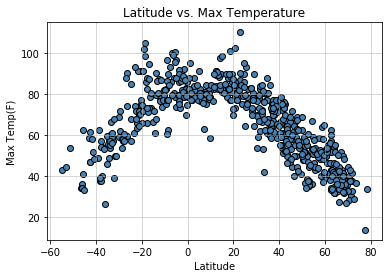

In [23]:
plotfunction(weather_df["Lat"],weather_df["Max Temp"],"Latitude","Max Temp(F)",
            "Latitude vs. Max Temperature","LatvTemp")

## Latitude vs. Humidity Plot

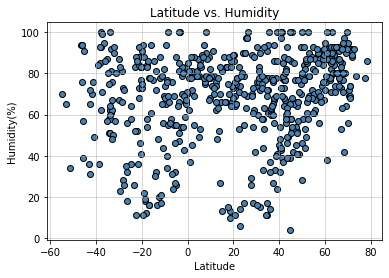

In [24]:
plotfunction(weather_df["Lat"],weather_df["Humidity"],"Latitude","Humidity(%)",
            "Latitude vs. Humidity","LatvHum")

## Latitude vs. Cloudiness Plot

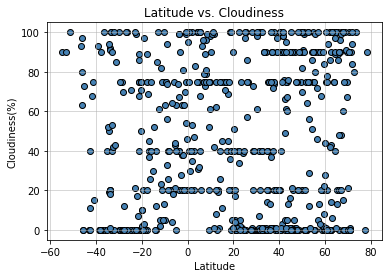

In [25]:
plotfunction(weather_df["Lat"],weather_df["Cloudiness"],"Latitude","Cloudiness(%)",
            "Latitude vs. Cloudiness","LatvCloud")

## Latitude vs. Wind Speed Plot

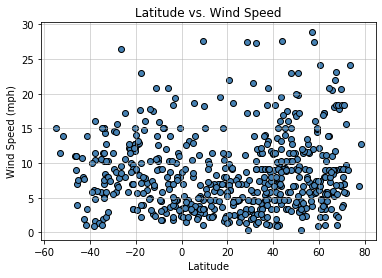

In [26]:
plotfunction(weather_df["Lat"],weather_df["Wind Speed"],"Latitude","Wind Speed (mph)",
            "Latitude vs. Wind Speed","LatvWind")

## Linear Regression

In [38]:
#Create northern and southern hemisphere dataframes
north_hem=weather_df.loc[(weather_df["Lat"]>=0),:]
south_hem=weather_df.loc[(weather_df["Lat"]<0),:]

In [34]:
def lin_reg_plot(x_data,y_data,x_label,y_label,title,x_pos,y_pos,figname):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-value is: {round(rvalue,3)}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_data,y_data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="red")
    plt.savefig(f"../Images/{figname}.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.862


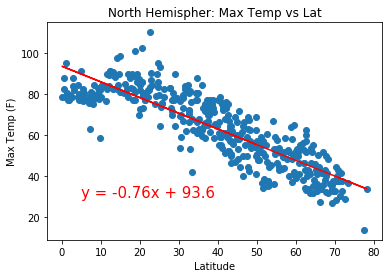

In [39]:
lin_reg_plot(north_hem["Lat"],north_hem["Max Temp"],"Latitude","Max Temp (F)",
             "North Hemispher: Max Temp vs Lat",5,30,"NH_TempvLat")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.795


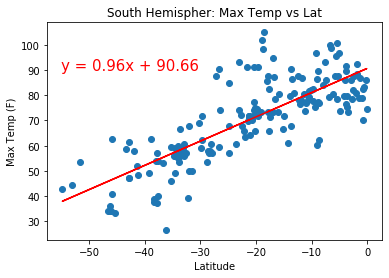

In [41]:
lin_reg_plot(south_hem["Lat"],south_hem["Max Temp"],"Latitude","Max Temp (F)",
             "South Hemispher: Max Temp vs Lat",-55,90,"SH_TempvLat")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.173


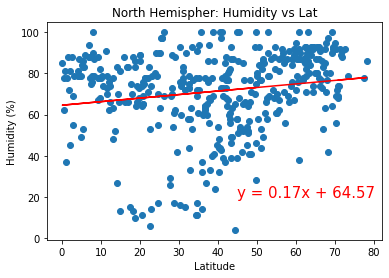

In [45]:
lin_reg_plot(north_hem["Lat"],north_hem["Humidity"],"Latitude","Humidity (%)",
             "North Hemispher: Humidity vs Lat",45,20,"NH_HumvLat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.104


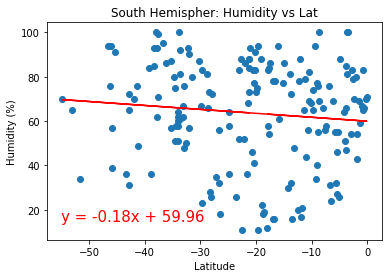

In [46]:
lin_reg_plot(south_hem["Lat"],south_hem["Humidity"],"Latitude","Humidity (%)",
             "South Hemispher: Humidity vs Lat",-55,15,"SH_HumvLat")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.037


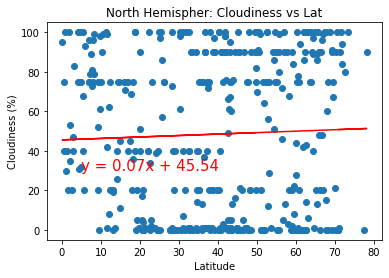

In [47]:
lin_reg_plot(north_hem["Lat"],north_hem["Cloudiness"],"Latitude","Cloudiness (%)",
             "North Hemispher: Cloudiness vs Lat",5,30,"NH_CloudvLat")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.032


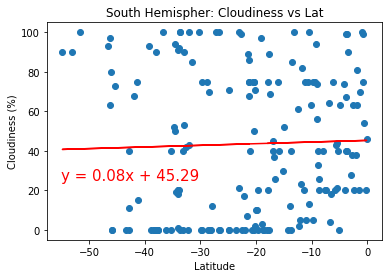

In [49]:
lin_reg_plot(south_hem["Lat"],south_hem["Cloudiness"],"Latitude","Cloudiness (%)",
             "South Hemispher: Cloudiness vs Lat",-55,25,"SH_CloudvLat")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.213


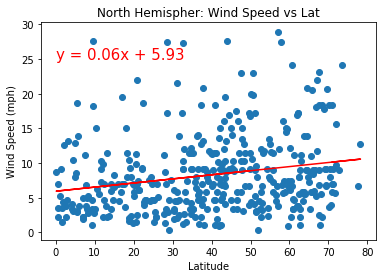

In [52]:
lin_reg_plot(north_hem["Lat"],north_hem["Wind Speed"],"Latitude","Wind Speed (mph)",
             "North Hemispher: Wind Speed vs Lat",0,25,"NH_WindvLat")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.044


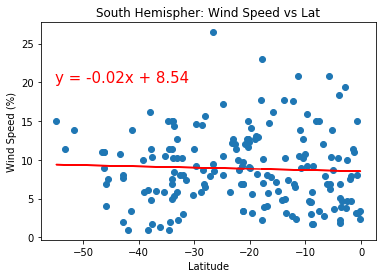

In [53]:
lin_reg_plot(south_hem["Lat"],south_hem["Wind Speed"],"Latitude","Wind Speed (%)",
             "South Hemispher: Wind Speed vs Lat",-55,20,"SH_WindvLat")

In [55]:
weather_df.to_csv("../output_data/cities.csv")